In [2]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
import plotly.io as pio
pio.renderers.default = "notebook"



In [3]:
df = pd.read_csv("TATASTEEL.csv")

In [4]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,17-Jan-2025,EQ,127.90,131.16,127.64,127.81,130.15,130.28,129.60,184.60,122.62,"2,74,21,959","3,55,37,81,052.65","2,08,791"
1,16-Jan-2025,EQ,128.00,128.47,126.56,126.53,127.70,127.81,127.54,184.60,122.62,"2,21,64,393","2,82,68,49,469.18","1,76,428"
2,15-Jan-2025,EQ,128.00,128.31,125.78,126.93,126.60,126.53,127.00,184.60,122.62,"1,87,73,125","2,38,41,73,457.53","1,96,481"
3,14-Jan-2025,EQ,122.94,127.64,122.94,122.93,127.22,126.93,126.13,184.60,122.62,"3,68,77,365","4,65,14,65,899.79","2,53,782"
4,13-Jan-2025,EQ,126.00,126.50,122.62,127.43,122.80,122.93,124.43,184.60,122.62,"3,89,68,332","4,84,87,85,035.50","3,30,215"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,24-Jan-2024,EQ,130.20,135.55,130.10,130.10,134.90,135.15,133.35,141.25,101.55,"3,93,40,119","5,24,58,53,350.90","2,16,385"
245,23-Jan-2024,EQ,134.80,135.20,129.30,133.95,130.05,130.10,132.31,141.25,101.55,"3,53,73,970","4,68,04,31,862.50","2,17,517"
246,20-Jan-2024,EQ,134.25,135.20,133.30,134.25,133.90,133.95,134.26,141.25,101.55,"1,65,78,179","2,22,57,19,129.05","1,22,378"
247,19-Jan-2024,EQ,132.60,134.70,131.60,131.00,134.10,134.25,133.63,141.25,101.55,"3,26,53,013","4,36,35,34,601.95","1,87,679"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   series         249 non-null    object 
 2   OPEN           249 non-null    float64
 3   HIGH           249 non-null    float64
 4   LOW            249 non-null    float64
 5   PREV. CLOSE    249 non-null    float64
 6   ltp            249 non-null    float64
 7   close          249 non-null    float64
 8   vwap           249 non-null    float64
 9   52W H          249 non-null    float64
 10  52W L          249 non-null    float64
 11  VOLUME         249 non-null    object 
 12  VALUE          249 non-null    object 
 13  No of trades   249 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.4+ KB


In [6]:
df.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,154.870402,156.450482,152.538313,154.389960,154.440884,154.384458,154.471124,175.373373,111.876104
std,13.225783,13.288780,13.061971,13.158485,13.177936,13.168315,13.153032,13.921748,8.677791
min,122.940000,126.500000,122.620000,122.930000,122.800000,122.930000,124.430000,141.250000,101.550000
25%,145.000000,146.830000,143.050000,144.530000,144.540000,144.530000,145.050000,169.800000,104.050000
50%,153.000000,154.300000,151.050000,152.700000,152.600000,152.700000,152.640000,184.600000,114.350000
75%,165.550000,167.100000,162.330000,164.950000,164.850000,164.950000,164.780000,184.600000,114.600000
max,183.800000,184.600000,181.500000,183.150000,182.900000,183.150000,182.950000,184.600000,128.200000


In [14]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

fig = px.area(df, x ='Date', y = 'close', title = 'TATA STEEL Stock Price', labels = {'close':'Price (in Rs.)', 'Date':'Date'})
fig.show()

In [15]:
fig2 = px.line(df, x ='Date', y = 'close', title = 'TATA STEEL Stock Price', labels = {'close':'Price (in Rs.)', 'Date':'Date'})
fig2.show()

In [31]:
fign = px.bar(df, x ='Date', y = 'close', title = 'TATA STEEL Stock Price', labels = {'close':'Price (in Rs.)', 'Date':'Date'})
fign.show()

In [28]:
df['VOLUME'] = df['VOLUME'].astype(float)

In [29]:
fig3 = px.area(df, x ='Date', y = 'VOLUME', title = 'TATA STEEL Stock Volume', labels = {'Volume':'Volume', 'Date':'Date'})
fig3.show()

In [30]:
fig4 = px.bar(df, x ='Date', y = 'VOLUME', title = 'TATA STEEL Stock Volume', labels = {'Volume':'Volume', 'Date':'Date'})
fig4.show()

In [33]:
px.box(df, y='close')

In [35]:
columns = ['Date', 'close']
ndf = pd.DataFrame(df, columns=columns)

In [36]:
ndf

,Date,close
0,17-Jan-2025,130.28
1,16-Jan-2025,127.81
2,15-Jan-2025,126.53
3,14-Jan-2025,126.93
4,13-Jan-2025,122.93
...,...,...
244,24-Jan-2024,135.15
245,23-Jan-2024,130.10
246,20-Jan-2024,133.95
247,19-Jan-2024,134.25


In [37]:
prophet_df = ndf.rename(columns = {'Date':'ds', 'close':'y'})

In [38]:
prophet_df

,ds,y
0,17-Jan-2025,130.28
1,16-Jan-2025,127.81
2,15-Jan-2025,126.53
3,14-Jan-2025,126.93
4,13-Jan-2025,122.93
...,...,...
244,24-Jan-2024,135.15
245,23-Jan-2024,130.10
246,20-Jan-2024,133.95
247,19-Jan-2024,134.25


In [39]:
# Create a model
model = Prophet()
model.fit(prophet_df)

23:18:22 - cmdstanpy - INFO - Chain [1] start processing
23:18:22 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
# Forecasting
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-18,132.955178,127.117822,138.697888,132.955178,132.955178,-0.281925,-0.281925,-0.281925,-0.281925,-0.281925,-0.281925,0.0,0.0,0.0,132.673253
1,2024-01-19,133.284091,127.448141,139.436834,133.284091,133.284091,0.084756,0.084756,0.084756,0.084756,0.084756,0.084756,0.0,0.0,0.0,133.368847
2,2024-01-20,133.613004,129.366457,141.949915,133.613004,133.613004,2.003007,2.003007,2.003007,2.003007,2.003007,2.003007,0.0,0.0,0.0,135.616011
3,2024-01-23,134.599742,128.468846,140.419922,134.599742,134.599742,-0.210719,-0.210719,-0.210719,-0.210719,-0.210719,-0.210719,0.0,0.0,0.0,134.389024
4,2024-01-24,134.928655,128.466211,140.028047,134.928655,134.928655,-0.556710,-0.556710,-0.556710,-0.556710,-0.556710,-0.556710,0.0,0.0,0.0,134.371945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2025-02-12,126.981277,119.677494,132.149080,125.259270,128.730512,-0.556710,-0.556710,-0.556710,-0.556710,-0.556710,-0.556710,0.0,0.0,0.0,126.424567
275,2025-02-13,126.748553,120.099113,132.953313,124.913193,128.619655,-0.281925,-0.281925,-0.281925,-0.281925,-0.281925,-0.281925,0.0,0.0,0.0,126.466627
276,2025-02-14,126.515828,120.256875,133.267508,124.602017,128.538022,0.084756,0.084756,0.084756,0.084756,0.084756,0.084756,0.0,0.0,0.0,126.600584
277,2025-02-15,126.283103,121.951243,134.658842,124.224107,128.444719,2.003007,2.003007,2.003007,2.003007,2.003007,2.003007,0.0,0.0,0.0,128.286110


In [43]:
px.line(forecast, x='ds', y='yhat')

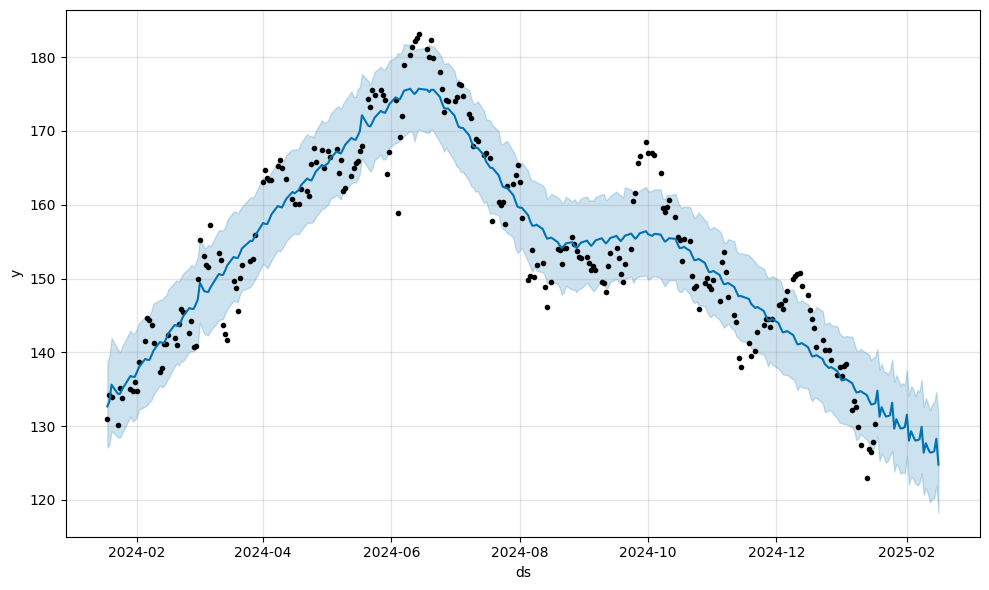

In [44]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

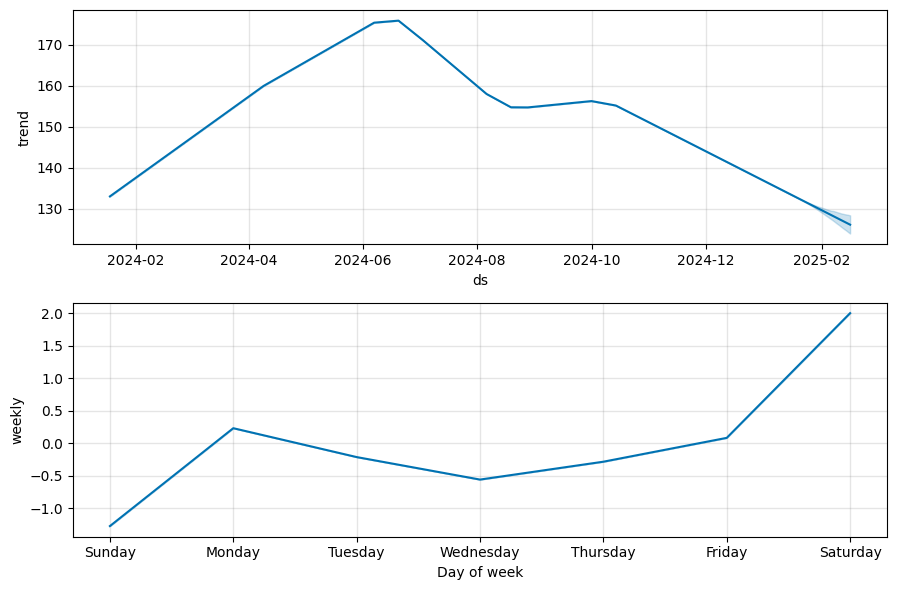

In [45]:
figure2 = model.plot_components(forecast)

In [46]:
# Download the forecast data
forecast.to_csv('forecast.csv')

